In [16]:
import pickle
import numpy as np
from labeling_functions import get_all_lfs
#from itables import init_notebook_mode

from tqdm import tqdm
#init_notebook_mode(all_interactive=True)
all_lfs = get_all_lfs()

from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

from pruning_lfs import prune_lfs

In [4]:
# clustering

val_simp_labels = pickle.load(open("/workspace/datasets/ds_labels/MTurkSF_simp_labels.pkl", "rb"))
val_src_labels = pickle.load(open("/workspace/datasets/ds_labels/MTurkSF_src_labels.pkl", "rb"))

val_all_labels = np.concatenate([val_simp_labels, val_src_labels])

In [5]:
val_src_labels.shape

(221, 328)

In [6]:
val_all_labels.shape

(442, 328)

In [8]:
from sklearn.cluster import AgglomerativeClustering

In [9]:
len(all_lfs)

1249

In [10]:
#transpose mat to consider lfs as samples to cluster on

X = val_all_labels.transpose()


In [11]:
X.shape

(328, 442)

In [37]:
num_clusters = 4

In [38]:
clustering = AgglomerativeClustering(n_clusters=num_clusters).fit(X)
clustering_for_dendo = AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(X)

In [39]:
clustering.labels_

array([0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 1, 0, 2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3,
       1, 1, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1, 3, 3, 1, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [40]:
from collections import Counter

Counter(clustering.labels_)

Counter({0: 196, 2: 58, 1: 39, 3: 35})

In [41]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


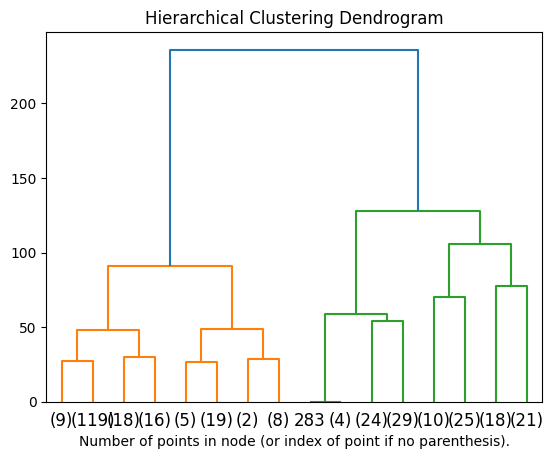

In [42]:
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(clustering_for_dendo, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [43]:
#cluster assignments

In [44]:
all_lfs = prune_lfs()
len(all_lfs)

/workspace/pruning_lfs.py:52: RuntimeWarning: invalid value encountered in scalar divide
  merged_data.append([index, polarity, cov_simp, cov_src, precision, 1 - precision, cov_simp+cov_src, abs(cov_simp - cov_src), abs(cov_simp - cov_src)/(cov_simp+cov_src)])


328

In [45]:
clusters_lf_map = {i:[] for i in range(num_clusters)}

for i in range(len(all_lfs)):
    clusters_lf_map[clustering.labels_[i]].append(all_lfs[i].name) 

In [46]:
for key, lf_list in clusters_lf_map.items():
    print(key)
    for lf in lf_list:
        print(lf)
    print()
    print()

0
lf_words_cnt_wcount=15_SIMPLE
lf_words_cnt_wcount=16_SIMPLE
lf_words_cnt_wcount=17_SIMPLE
lf_words_cnt_wcount=18_SIMPLE
lf_words_cnt_wcount=29_NOT_SIMPLE
lf_words_cnt_wcount=30_NOT_SIMPLE
lf_words_cnt_wcount=31_NOT_SIMPLE
lf_words_cnt_wcount=32_NOT_SIMPLE
lf_words_cnt_wcount=33_NOT_SIMPLE
lf_words_cnt_wcount=34_NOT_SIMPLE
lf_words_cnt_wcount=35_NOT_SIMPLE
lf_words_cnt_wcount=36_NOT_SIMPLE
lf_words_cnt_wcount=37_NOT_SIMPLE
lf_words_cnt_wcount=38_NOT_SIMPLE
lf_words_cnt_wcount=39_NOT_SIMPLE
lf_infrequent_words_cnt=1_bunny_SIMPLE
lf_infrequent_words_cnt=2_sheep_SIMPLE
lf_infrequent_words_cnt=2_bat_SIMPLE
low_prop_long_words_syllables_long=2_prop=0.25_label=0
low_prop_long_words_letters_long=5_prop=0.3_label=0
low_prop_long_words_letters_long=6_prop=0.15_label=0
low_prop_long_words_letters_long=6_prop=0.2_label=0
low_prop_long_words_letters_long=7_prop=0.1_label=0
low_prop_long_words_letters_long=8_prop=0.05_label=0
low_prop_long_words_letters_long=8_prop=0.075_label=0
low_prop_long_word

In [53]:
cluster_dic = {}

for i in range(len(all_lfs)):
    cluster_dic[all_lfs[i].name] = clustering.labels_[i]



In [56]:
pickle.dump(cluster_dic, open("/workspace/datasets/auto_cluster_dic.pkl", "wb"))